In [3]:
# load the data in and check min, max, and counts  
from pandas import DataFrame, Series, read_csv
import numpy as np

project_home = '/Users/catcamacho/Box/SNAP/BABIES/misc/'
data_file = project_home + 'ibq_fullsample.csv'
data = read_csv(data_file, index_col=None)
ibq_data= data.iloc[:,1:15]
ibq_data.describe()

,activity_level,distress_to_limitations,fear,duration_of_orienting,smiling_laughter,high_intensity_pleasure,low_intensity_pleasure,soothability,falling_reactivity,cuddliness,perceptual_sensitivity,sadness,approach,vocal_reactivity
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,4.263736,3.868132,3.010989,4.049450,4.762951,6.194662,5.828624,5.615385,2.771062,5.736264,5.255312,3.573260,5.716117,5.059655
std,0.965134,0.941420,1.422439,1.066752,1.067180,0.756384,0.870539,0.772161,0.888072,0.872086,1.568039,1.093812,0.787829,0.951206
min,2.285710,1.714290,1.000000,1.500000,1.714290,4.285710,3.285710,3.714290,1.166670,2.833330,1.333330,1.500000,2.666670,2.714290
25%,3.571430,3.285710,2.000000,3.250000,4.000000,5.714290,5.285710,5.214285,2.166670,5.166670,4.333330,2.833330,5.333330,4.357140
50%,4.285710,3.857140,2.666670,4.166670,4.714290,6.285710,5.857140,5.714290,2.666670,5.833330,5.166670,3.500000,5.833330,5.142860
75%,5.000000,4.357140,3.916665,4.833330,5.571430,6.857140,6.428570,6.142860,3.333330,6.333330,6.416665,4.250000,6.166670,5.785715
max,6.571430,6.428570,7.500000,6.500000,6.714290,7.285710,7.714290,7.000000,4.833330,7.000000,8.000000,6.333330,7.000000,7.142860


In [51]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(ibq_data)
std_ibq = std.fit_transform(ibq_data)
labels = []
for a in ibq_data.columns:
    labels.append(a + '_std')
std_ibq_data = DataFrame(data=std_ibq,columns=labels)
std_ibq_data.describe()

,activity_level_std,distress_to_limitations_std,fear_std,duration_of_orienting_std,smiling_laughter_std,high_intensity_pleasure_std,low_intensity_pleasure_std,soothability_std,falling_reactivity_std,cuddliness_std,perceptual_sensitivity_std,sadness_std,approach_std,vocal_reactivity_std
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,-4.294489e-16,-4.874001e-16,-2.403450e-16,-2.196046e-16,2.507152e-16,-1.339588e-15,1.422092e-16,-4.636096e-17,-6.344132e-17,4.318890e-16,-4.587295e-16,8.540177e-17,-8.619479e-16,-4.758099e-16
std,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00
min,-2.060838e+00,-2.300540e+00,-1.421593e+00,-2.403160e+00,-2.872571e+00,-2.537770e+00,-2.937262e+00,-2.475685e+00,-1.816611e+00,-3.347165e+00,-2.515059e+00,-1.905946e+00,-3.892142e+00,-2.479336e+00
25%,-7.212902e-01,-6.220904e-01,-7.146807e-01,-7.535769e-01,-7.188834e-01,-6.386090e-01,-6.271075e-01,-5.223288e-01,-6.843371e-01,-6.567579e-01,-5.912413e-01,-6.802169e-01,-4.885676e-01,-7.426434e-01
50%,2.289357e-02,-1.174029e-02,-2.434032e-01,1.104936e-01,-4.585075e-02,1.210394e-01,3.293836e-02,1.287986e-01,-1.182003e-01,1.119200e-01,-5.684337e-02,-6.734803e-02,1.496041e-01,8.795834e-02
75%,7.670878e-01,5.223148e-01,6.402340e-01,7.388999e-01,7.617809e-01,8.807010e-01,6.929842e-01,6.869004e-01,6.366413e-01,6.884342e-01,7.447439e-01,6.221260e-01,5.750605e-01,7.675344e-01
max,2.404307e+00,2.734830e+00,3.173339e+00,2.309935e+00,1.838629e+00,1.450444e+00,2.178090e+00,1.803104e+00,2.335052e+00,1.457124e+00,1.760093e+00,2.537329e+00,1.638676e+00,2.202202e+00


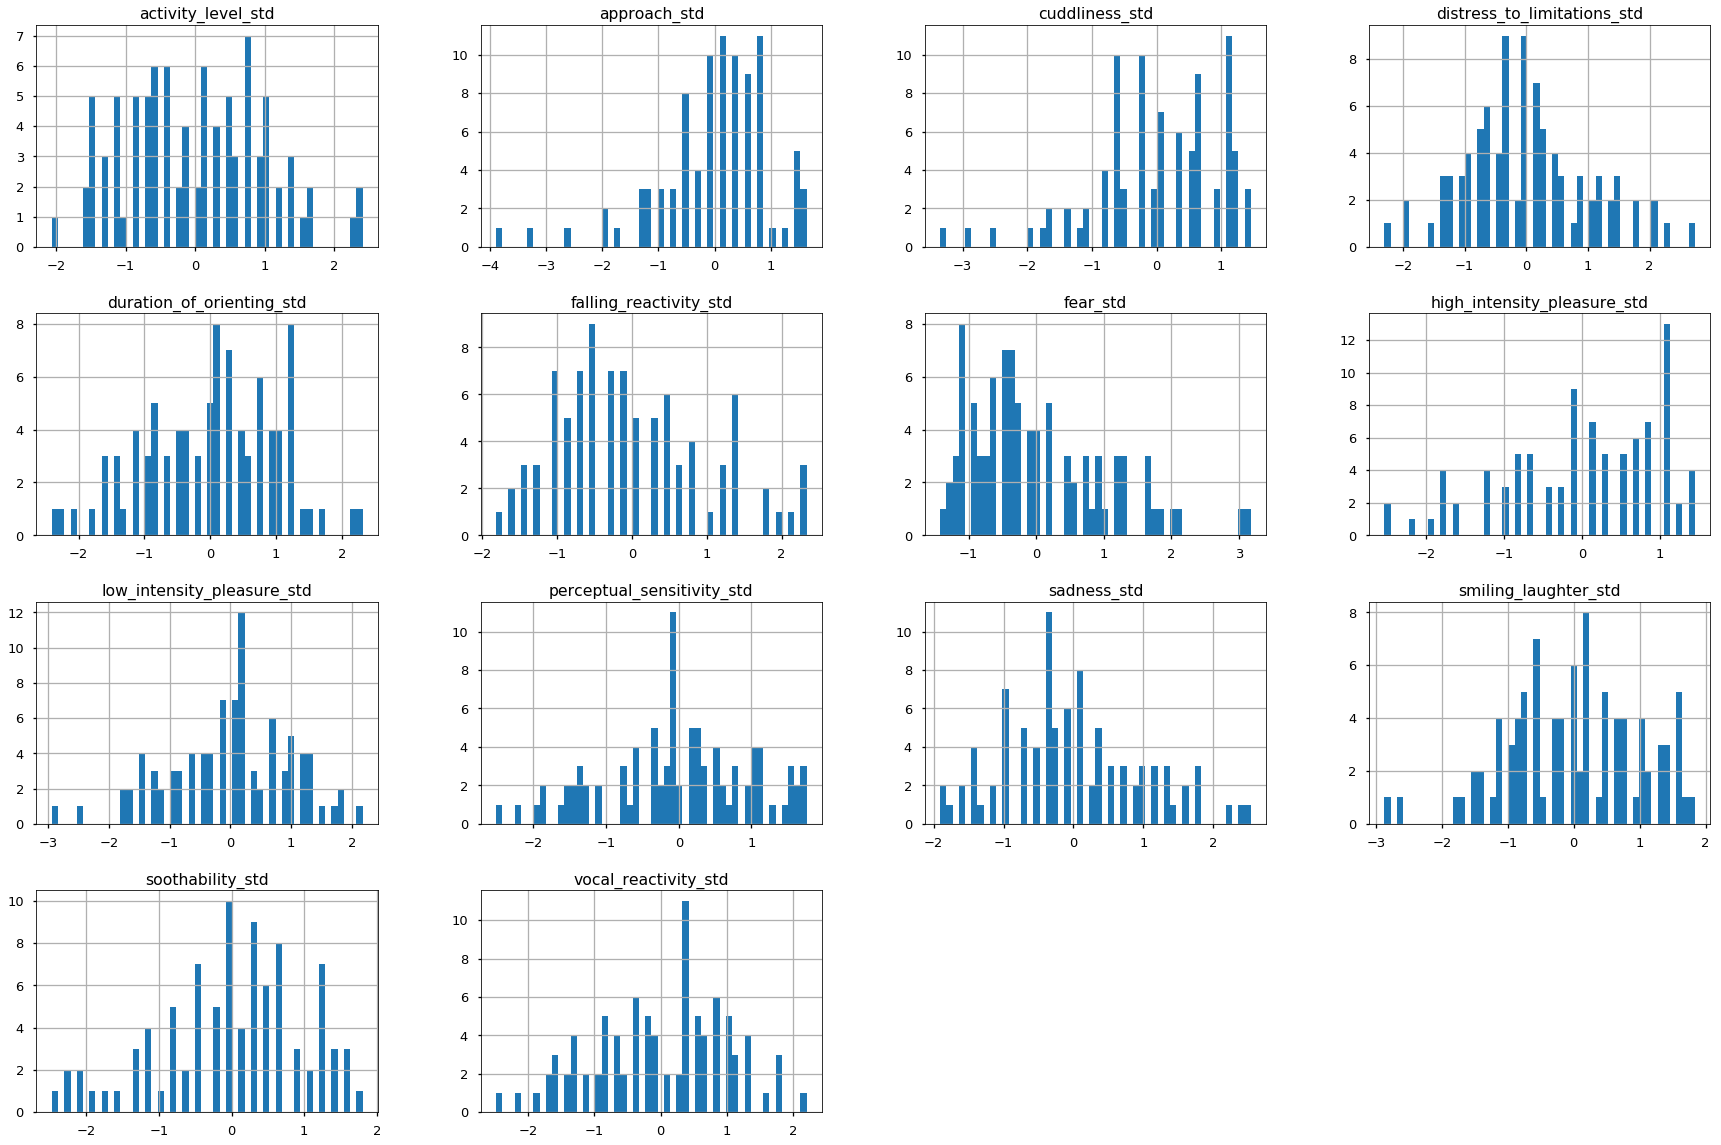

In [52]:
import matplotlib.pyplot as plt

std_ibq_data.hist(bins=50, figsize=(30,20))
plt.show()

In [54]:
# Decompose the data down to the principle components capturing 95% of the variance# Decom 
from sklearn.decomposition import PCA
from numpy import sum

pca = PCA(random_state=0)
pca_fit = pca.fit_transform(std_ibq)
ibq_back=pca.inverse_transform(pca_fit)
print(pca.explained_variance_ratio_)
ibq_components = ibq_back[:,:3]
ibq_components.shape

[0.20146306 0.18665717 0.09533182 0.08735082 0.07298535 0.06765253
 0.05429053 0.04640194 0.04167684 0.03729759 0.03418097 0.02996805
 0.02688319 0.01786015]


(91, 3)

silhouette average for 2 clusters:0.2745777376593736
[ 0.57739222 -0.73617508] [ 0.52082149 -0.6640474 ]


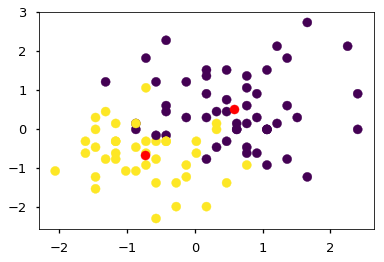

[51 40]


In [55]:
# Use K-means to cluster the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique

n=2

kmeans = KMeans(n_clusters=n, random_state=0, max_iter=500).fit(ibq_components)
silhouette_avg = silhouette_score(ibq_components, kmeans.fit_predict(ibq_components))
print('silhouette average for '+ str(n) + ' clusters:' + str(silhouette_avg))

cluster_centers = kmeans.cluster_centers_
print(cluster_centers[:,0],cluster_centers[:,1])
plt.figure()
plt.scatter(ibq_components[:,0],ibq_components[:,1], c=kmeans.labels_)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], c='red')
plt.savefig(project_home + str(n) + 'component_scatter.png')
plt.show()

groups = kmeans.labels_
std_ibq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
all_data = data.join(std_ibq_data)
all_data.to_csv(project_home + str(n) + 'kmeans_group_fulldata.csv')

group_names, group_ns = unique(groups, return_counts=True)
print(group_ns)

std_ibq_data_m = std_ibq_data.groupby('kmgroup').mean()
std_ibq_data_m.to_csv(project_home + str(n) + 'kmeans_group_summary_fulldata.csv')

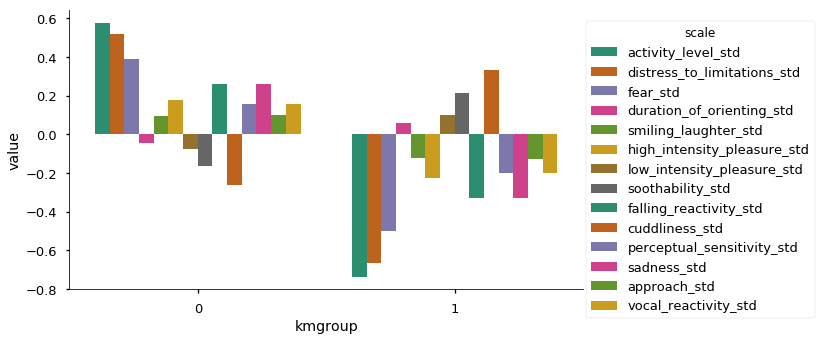

In [62]:
# Visualize the new groups
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import melt

sns.set_context('talk')

long_std_ibq = melt(std_ibq_data, id_vars=['kmgroup'],
                    value_vars=['activity_level_std', 'distress_to_limitations_std', 'fear_std',
                                'duration_of_orienting_std', 'smiling_laughter_std',
                                'high_intensity_pleasure_std', 'low_intensity_pleasure_std',
                                'soothability_std', 'falling_reactivity_std', 'cuddliness_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'approach_std',
                                'vocal_reactivity_std'], 
                    var_name='scale',
                    value_name='value')
#long_std_cbq
plt.figure(figsize=(40,10))

sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_ibq, 
               kind='bar',size=5,palette = 'Dark2', legend=True, aspect=1.75, ci=None)
plt.savefig(project_home + str(n) + 'groups_plots.svg',transparent=True)

Age: the t-value is -0.290544 and the pvalue is 0.772123
CESD: the t-value is 3.091304 and the pvalue is 0.002680


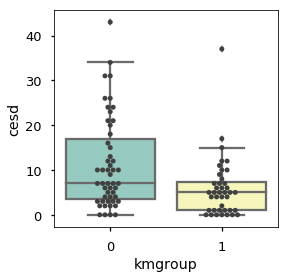

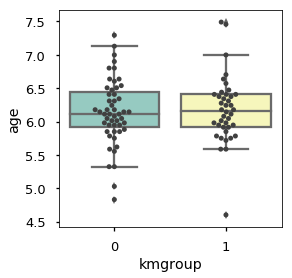

In [61]:
from pandas import read_csv
ibq_data = read_csv(project_home + str(n) + 'kmeans_group_fulldata.csv', index_col=0)
kmg0 = ibq_data[ibq_data['kmgroup']==0]
kmg1 = ibq_data[ibq_data['kmgroup']==1]


from scipy.stats import ttest_ind

t,p=ttest_ind(kmg0['age'],kmg1['age'], equal_var=False)

print('Age: the t-value is %f and the pvalue is %f' % (t,p))

t,p=ttest_ind(kmg0['cesd'],kmg1['cesd'], equal_var=False)

print('CESD: the t-value is %f and the pvalue is %f' % (t,p))

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
plt.figure(figsize=(4,4))
ax = sns.boxplot(x='kmgroup',y='cesd',data=ibq_data, palette='Set3')
ax = sns.swarmplot(x='kmgroup',y='cesd',data=ibq_data, color='0.25')
plt.savefig(project_home + 'cesd_plot_full.svg')
plt.show()
plt.close()

plt.figure(figsize=(4,4))
ax = sns.boxplot(x='kmgroup',y='age',data=ibq_data, palette='Set3')
ax = sns.swarmplot(x='kmgroup',y='age',data=ibq_data, color='0.25')
plt.savefig(project_home + 'age_plot_full.svg')
plt.show()
plt.close()

In [58]:
from scipy.stats import ttest_ind
from pandas import read_csv
ibq_data = read_csv(project_home + str(n) + 'kmeans_group_fulldata.csv', index_col=0)
kmg0 = ibq_data[ibq_data['kmgroup']==0]
kmg1 = ibq_data[ibq_data['kmgroup']==1]

scales = ['activity_level','distress_to_limitations', 'fear', 'duration_of_orienting',
          'smiling_laughter', 'high_intensity_pleasure', 'low_intensity_pleasure',
          'soothability', 'falling_reactivity', 'cuddliness','perceptual_sensitivity', 
          'sadness', 'approach', 'vocal_reactivity']
for scale in scales:
    t,p=ttest_ind(kmg0[scale],kmg1[scale], equal_var=False)
    print('%s: the tvalue is %f and the pvalue is %f' % (scale,t,p))

activity_level: the tvalue is 8.345985 and the pvalue is 0.000000
distress_to_limitations: the tvalue is 7.074753 and the pvalue is 0.000000
fear: the tvalue is 4.914887 and the pvalue is 0.000004
duration_of_orienting: the tvalue is -0.496307 and the pvalue is 0.620985
smiling_laughter: the tvalue is 1.044285 and the pvalue is 0.299274
high_intensity_pleasure: the tvalue is 1.894622 and the pvalue is 0.061826
low_intensity_pleasure: the tvalue is -0.849544 and the pvalue is 0.397864
soothability: the tvalue is -1.835577 and the pvalue is 0.069809
falling_reactivity: the tvalue is 2.960888 and the pvalue is 0.003933
cuddliness: the tvalue is -2.897772 and the pvalue is 0.004813
perceptual_sensitivity: the tvalue is 1.715964 and the pvalue is 0.089739
sadness: the tvalue is 2.983162 and the pvalue is 0.003681
approach: the tvalue is 1.039527 and the pvalue is 0.301956
vocal_reactivity: the tvalue is 1.713106 and the pvalue is 0.090463
